# 八、回归分析
本章介绍**多元线性回归分析**、**岭回归**、**LASSO回归**和**Logistic回归**及其Python实现。

## （〇）拟合与回归的区别

## （一）多元线性回回归分析
**本质：** 拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}$达到最小值

### 1.多元线性回归模型

多元回归分析是研究**随机变量**之间**相关关系**的一种统计方法。通过对变量实际观测的分析、计算，建立**一个变量**与**另一组变量**的定量关系即回归方程，经统计检验认为回归效果显著后，可用于预测与控制。
设随机变量 $y$ 与变量 $x_{1}, x_{2}, \cdots, x_{m}$ 有关，则其 $m$ 元线性回归模型为
\begin{equation}
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}+\varepsilon,
\tag{(1)}
\end{equation}
式中，$\varepsilon$ 是随机误差服从正态分布 $N\left(0, \sigma^{2}\right), \beta_{0}, \beta_{1}, \cdots, \beta_{m}$ 为回归系数。
回归分析的主要步骤是:
1. 由观测值确定参数 (回归系数) $\beta_{0}, \beta_{1}, \cdots, \beta_{m}$ 的 估计值 $b_{0}, b_{1}, \cdots, b_{m}$；
2. 对**线性关系**、**自变量**的显著性进行统计检验；
3. 利用回归方程进行预测.
#### （1）回归系数的最小二乘估计
对 $y$ 及 $x_{1}, x_{2}, \cdots, x_{m}$ 作 $n$ 次抽样得到 $n$ 组数据 $\left(y_{i}, x_{i 1}, \cdots, x_{i m}\right), i=1, \cdots, n$, $n>m$, 代入(1)，有
\begin{equation}
y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\cdots+\beta_{m} x_{i m}+\varepsilon_{i}
\tag{(2)}
\end{equation}
式中，$\varepsilon_{i}(i=1,2, \cdots, n)$ 是服从正态分布 $N\left(0, \sigma^{2}\right)$ 的 $n$ 个**相互独立同分布**的随机变量。
记
$$
\boldsymbol{X}=\left[\begin{array}{ccccc}
1 & x_{11} & x_{12} & \cdots & x_{1 m} \\
1 & x_{21} & x_{22} & \cdots & x_{2 m} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{n 1} & x_{n 2} & \cdots & x_{n m}
\end{array}\right], \quad \boldsymbol{Y}=\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array}\right]
$$
$$
\boldsymbol{\varepsilon}=\left[\varepsilon_{1}, \varepsilon_{2}, \cdots, \varepsilon_{n}\right]^{\mathrm{T}}, \quad \boldsymbol{\beta}=\left[\beta_{0}, \beta_{1}, \cdots, \beta_{m}\right]^{\mathrm{T}} .
$$
式(2)可以表示为
$$
\left\{\begin{array}{l}
\boldsymbol{Y}=\boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{\varepsilon} \\
\varepsilon \sim N\left(0, \sigma^{2} \boldsymbol{E}_{n}\right)
\end{array}\right.
$$
其中，$\boldsymbol{E}_{n}$ 为 $n$ 阶单位矩阵.
模型(1)中的参数 $\beta_{0}, \beta_{1}, \cdots, \beta_{m}$ 用最小二乘法估计，即应选取估计值 $b_{j}$，使当 $\beta_{j}=b_{j}, j=0,1,2, \cdots, m$ 时，误差平方和
$$
Q=\sum_{i=1}^{n} \varepsilon_{i}^{2}=\sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i 1}-\cdots-\beta_{m} x_{i m}\right)^{2}
$$
达到最小。为此，令
$$
\frac{\partial Q}{\partial \beta_{j}}=0, \quad j=0,1,2, \cdots, m
$$
得
$$
\left\{\begin{array}{l}
\frac{\partial Q}{\partial \beta_{0}}=-2 \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i 1}-\cdots-\beta_{m} x_{i m}\right)=0, \\
\frac{\partial Q}{\partial \beta_{j}}=-2 \sum_{i=1}^{n}\left(y_{i}-\beta_{0}-\beta_{1} x_{i 1}-\cdots-\beta_{m} x_{i m}\right) x_{i j}=0, \quad j=1,2, \cdots, m .
\end{array}\right.
$$
经整理化为以下正规方程组
$$
\left\{\begin{array}{c}
\beta_{0} n+\beta_{1} \sum_{i=1}^{n} x_{i 1}+\beta_{2} \sum_{i=1}^{n} x_{i 2}+\cdots+\beta_{m} \sum_{i=1}^{n} x_{i m}=\sum_{i=1}^{n} y_{i} \\
\beta_{0} \sum_{i=1}^{n} x_{i 1}+\beta_{1} \sum_{i=1}^{n} x_{i 1}^{2}+\beta_{2} \sum_{i=1}^{n} x_{i 1} x_{i 2}+\cdots+\beta_{m} \sum_{i=1}^{n} x_{i 1} x_{i m}=\sum_{i=1}^{n} x_{i 1} y_{i} \\
\ldots \cdots \\
\beta_{0} \sum_{i=1}^{n} x_{i m}+\beta_{1} \sum_{i=1}^{n} x_{i 1} x_{i m}+\beta_{2} \sum_{i=1}^{n} x_{i 2} x_{i m}+\cdots+\beta_{m} \sum_{i=1}^{n} x_{i m}^{2}=\sum_{i=1}^{n} x_{i m} y_{i}
\end{array}\right.
$$
正规方程组的矩阵形式为
\begin{equation}
\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X} \boldsymbol{\beta}=\boldsymbol{X}^{\mathrm{T}} \boldsymbol{Y}
\tag{(3)}
\end{equation}
当矩阵 $\boldsymbol{X}$ 列满秩时，$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$ 为可逆方阵，式(3)的解为
$$
\hat{\boldsymbol{\beta}}=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{Y}
$$
将 $\hat{\boldsymbol{\beta}}=\left[b_{0}, b_{1}, \cdots, b_{m}\right]$ 代入(1)，得到 $y$ 的估计值
$$
\hat{y}=b_{0}+b_{1} x_{1}+\cdots+b_{m} x_{m}
$$
而这组数据的拟合值为 $\hat{Y}=X \hat{\boldsymbol{\beta}}$，拟合误差 $e=Y-\hat{Y}$ 称为残差，可作为随机误差 $\varepsilon$ 的估计，而
\begin{equation}
\mathrm{SSE} = ||e||_2^2 = \sum_{i=1}^{n} e_{i}^{2}=\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
\tag{(4)}
\end{equation}
为残差平方和 (或剩余平方和)。


#### （2）回归方程和回归系数的检验
**SSE**: The sum of squares due to error
**SST**: Total sum of squares
**SSR**: Sum of squares of the regression
前面是在假定随机变量 $y$ 与变量 $x_{1}, x_{2}, \cdots, x_{m}$ 具有线性关系的条件下建立线性回归方程的，但变量 $y$ 与变量 $x_{1}, x_{2}, \cdots, x_{m}$ 是否有线性关系？所有的变量 $x_{1}, x_{2}, \cdots, x_{m}$ 对变量 $y$ 是否都有影响？需要做**统计检验**。
对总平方和 $\mathrm{SST}=\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}$ 进行分解，有
\begin{equation}
\mathrm{SST}=\mathrm{SSE}+\mathrm{SSR}
\tag{(5)}
\end{equation}
其中，SSE是由(4)定义的残差平方和，反映随机误差对 $y$ 的影响；$\mathrm{SSR}=\sum_{i=1}^{n}$ $\left(\hat{y}_{i}-\bar{y}\right)^{2}$ 称为回归平方和，反映自变量对 $y$ 的影响，这里$\bar{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i}, \hat{y}_{i}=b_{0}+$ $b_{1} x_{i 1}+\cdots+b_{m} x_{i m}$。上面的分解中利用了正规方程组，其中 SST 的自由度 $\mathrm{df}_{T}=$ $n-1, \mathrm{SSE}$ 的自由度 $\mathrm{df}_{E}=n-m-1, \mathrm{SSR}$ 的自由度 $\mathrm{df}_{R}=m$。
因变量 $y$ 与自变量 $x_{1}, \cdots, x_{m}$ 之间是否存在如式(1)所示的线性关系是需要检验的。显然，如果所有的 $\left|\hat{\beta}_{j}\right|(j=1, \cdots, m)$ 都很小，$y$ 与 $x_{1}, \cdots, x_{m}$ 的线性关系就不明显，所以可令原假设为
$$
H_{0}: \beta_{1}=\beta_{2}=\cdots=\beta_{m}=0
$$
当 $H_{0}$ 成立时由分解式(5)定义的 SSR, SSE 满足
$$
F=\frac{\mathrm{SSR} / m}{\operatorname{SSE} /(n-m-1)} \sim F(m, n-m-1)
$$
对显著性水平 $\alpha$，有上 $\alpha$ 分位数 $F_{\alpha}(m, n-m-1)$，若 $F>F_{\alpha}(m, n-m-1)$，回归方程效果显著；若 $F<F_{\alpha}(m, n-m-1)$，回归方程效果不显著。
**注：** 当 $y$ 与 $x_{1}, \cdots, x_{m}$ 的线性关系不明显时，可能存在**非线性关系**，如平方关系。
当上面的 $H_{0}$ 被拒绝时，$\beta_{j}$ 不全为零，但是不排除其中若干个等于零。所以应进一步作如下 $m+1$ 个检验 $(j=0,1, \cdots, m)$：
$$
H_{0}^{(j)}: \beta_{j}=0 \quad(j=0,1, \cdots, m)
$$
当 $H_{0}^{(j)}$ 为真时，统计量
$$
t_{j}=\frac{b_{j} / \sqrt{c_{j j}}}{\sqrt{\operatorname{SSE} /(n-m-1)}} \sim t(n-m-1)
$$
其中，$c_{j j}$ 是 $\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1}$ 中的第 $(j, j)$ 元素。
对给定的 $\alpha$，若 $\left|t_{j}\right|>t_{\alpha / 2}(n-m-1)(j=1,2, \cdots, m)$，拒绝 $H_{0}^{(j)}, x_{j}$ 的作用显著；否则，接受 $H_{0}^{(j)}, x_{j}$ 的作用不显著，去掉变量 $x_{j}$ 重新建立回归方程。
还有一些衡量 $y$ 与 $x_{1}, \cdots, x_{m}$ 相关程度的指标，如用回归平方和在总平方和中的比值定义复判定系数（也称拟合优度）
$$
R^{2}=\frac{\mathrm{SSR}}{\mathrm{SST}} .
$$
$R=\sqrt{R^{2}}$ 称为复相关系数，$R$ 越大，$y$ 与 $x_{1}, \cdots, x_{m}$ 相关关系越密切，通常，$R$ 大于 $0.8$ (或 $0.9)$ 才认为相关关系成立。


#### （3）回归方程的预测
对于给定的 $x_{1}^{(0)}, x_{2}^{(0)}, \cdots, x_{m}^{(0)}$，代入回归方程，得到
$$
\hat{y}_{0}=b_{0}+b_{1} x_{1}^{(0)}+b_{2} x_{2}^{(0)}+\cdots+b_{m} x_{m}^{(0)}
$$
用 $\hat{y}_{0}$ 作为 $y$ 在点 $x_{1}^{(0)}, x_{2}^{(0)}, \cdots, x_{m}^{(0)}$ 的预测值。
也可以进行区间估计，记 $s=\sqrt{\frac{\mathrm{SSE}}{n-m-1}}, \boldsymbol{x}_{0}=\left[1, x_{1}^{(0)}, x_{2}^{(0)}, \cdots, x_{m}^{(0)}\right]$，则 $y_{0}$ 的置信度为 $1-\alpha$ 的预测区间为
$$
\begin{aligned}
&\left(\hat{y}_{0}-t_{1-\alpha / 2}(n-m-1) s \sqrt{1+\boldsymbol{x}_{0}^{\mathrm{T}}\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{x}_{0}},\right. \\
&\left.\hat{y}_{0}+t_{1-\alpha / 2}(n-m-1) s \sqrt{1+\boldsymbol{x}_{0}^{\mathrm{T}}\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{x}_{0}}\right) .
\end{aligned}
$$
当 $n$ 较大时，有 $y_{0}$ 的近似预测区间：$95 \%$ 的预测区间为 $\left(\hat{y}_{0}-2 s, \hat{y}_{0}+2 s\right), 98 \%$ 的预测区间为 $\left(\hat{y}_{0}-3 s, \hat{y}_{0}+3 s\right)$。

### 2.Python求解线性回归分析

#### （1）利用模块sklearn_linear_model中的函数LinearRegression求解
利用模块sklearn_linear_model中的函数LinearRegression求解可以求解多元线性回归问题，但模型检验只有一个指标$R^2$，需要用户编程实现模型的其他统计检验。
构建并拟合模型的函数调用格式为 LinearRegression().fit(x,y)
其中，$x$为自变量观测值矩阵（不包括全部元素为1的第一列），$y$为因变量的观察值向量。

**例：** 水泥凝固时放出的热量 $y$ 与水泥中两种主要化学成分 $x_{1}, x_{2}$ 有关，今测得一组数据如下表所示，试确定一个线性回归模型 $y=a_{0}+a_{1} x_{1}+a_{2} x_{2}$。

表 $\quad x_{1}, x_{2}, y$ 的观测值

\begin{array}{cccc||cccc}
\hline 序号 & x_{1} & x_{2} & y & 序号 & x_{1} & x_{2} & y \\
\hline 1 & 7 & 26 & 78.5 & 8 & 1 & 31 & 72.5 \\
2 & 1 & 29 & 74.3 & 9 & 2 & 54 & 93.1 \\
3 & 11 & 56 & 104.3 & 10 & 21 & 47 & 115.9 \\
4 & 11 & 31 & 87.6 & 11 & 1 & 40 & 83.8 \\
5 & 7 & 52 & 95.9 & 12 & 11 & 66 & 113.3 \\
6 & 11 & 55 & 109.2 & 13 & 10 & 68 & 109.4 \\
7 & 3 & 71 & 102.7 & & & & \\
\hline
\end{array}
**解** 求得的回归模型为
$$
y=52.5773+1.4683 x_{1}+0.6623 x_{2}
$$
模型的复判定系数（也称为拟合优度）$R^{2}=0.9787$，拟合效果很好。

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

a = np.array([[7, 26, 78.5],
              [1, 29, 74.3],
              [11, 56, 104.3],
              [11, 31, 87.6],
              [7, 52, 95.9],
              [11, 55, 109.2],
              [3, 71, 102.7],
              [1, 31, 72.5],
              [2, 54, 93.1],
              [21, 47, 115.9],
              [1, 40, 83.8],
              [11, 66, 113.3],
              [10, 68, 109.4]
])

model = LinearRegression().fit(a[:, :2], a[:, 2]) # 构建并拟合模型
y = model.predict(a[:, :2]) # 求预测值
b0 = model.intercept_
b = model.coef_ # 输出回归系数
R2 = model.score(a[:, :2], a[:, 2]) # 计算R^2
print("b0=%.4f \nb1=%.4f \nb2=%.4f"%(b0, b[0], b[1]))
print("拟合优度R^2=%.4f"%R2)

b0=52.5773 
b1=1.4683 
b2=0.6623
拟合优度R^2=0.9787


#### （2）利用statsmodels库求解

statsmodels可以使用两种模式求解回归分析模型，一种是基于公式的模式，另一种是基于数组的模式。
1. 基于公式构建并拟合模型的调用格式为
import statsmodels.api as sm
sm.formula.ols(formula, data=df)
其中，formula为引号括起来的公式，df为数据框或字典格式的数据。
2. 基于数组构建并拟合模型的调用格式为
import statsmodels.api as sm
sm.OLS(y,X).fit()
其中，y为因变量的观察值向量，X为自变量观测值矩阵再添加第一列全部元素为1得到的增广阵。

In [ ]:
# 用statsmodels库基于公式求解上例
import statsmodels.api as sm
import numpy as np

a = np.array([[7, 26, 78.5],
              [1, 29, 74.3],
              [11, 56, 104.3],
              [11, 31, 87.6],
              [7, 52, 95.9],
              [11, 55, 109.2],
              [3, 71, 102.7],
              [1, 31, 72.5],
              [2, 54, 93.1],
              [21, 47, 115.9],
              [1, 40, 83.8],
              [11, 66, 113.3],
              [10, 68, 109.4]
])

d = {'x1': a[:, 0], 'x2': a[:, 1], 'y': a[:, 2]}
model = sm.formula.ols('y~x1+x2', d).fit() # 构建并拟合模型
print(model.summary(), '\n------------\n') # 显示模型所有信息
ypred = model.predict({'x1': a[:, 0], 'x2': a[:, 1]}) # 计算预测值
print(ypred) # 输出预测值

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     229.5
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           4.41e-09
Time:                        13:43:36   Log-Likelihood:                -28.156
No. Observations:                  13   AIC:                             62.31
Df Residuals:                      10   BIC:                             64.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.5773      2.286     22.998      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [ ]:
# 用statsmodels库基于数组求解上例
import statsmodels.api as sm
import numpy as np

a = np.array([[7, 26, 78.5],
              [1, 29, 74.3],
              [11, 56, 104.3],
              [11, 31, 87.6],
              [7, 52, 95.9],
              [11, 55, 109.2],
              [3, 71, 102.7],
              [1, 31, 72.5],
              [2, 54, 93.1],
              [21, 47, 115.9],
              [1, 40, 83.8],
              [11, 66, 113.3],
              [10, 68, 109.4]
])

X = sm.add_constant(a[:, :2]) # 增加第一列全部元素为1得到增广矩阵
print('X=', X)
model = sm.OLS(a[:, 2], X).fit() # 构建并拟合模型
print(model.params, '\n-----------\n') # 提取所有回归系数
y = model.predict(X) # 求已知自变量值的预测值
print(model.summary2()) # 输出模型的所有结果

X= [[ 1.  7. 26.]
 [ 1.  1. 29.]
 [ 1. 11. 56.]
 [ 1. 11. 31.]
 [ 1.  7. 52.]
 [ 1. 11. 55.]
 [ 1.  3. 71.]
 [ 1.  1. 31.]
 [ 1.  2. 54.]
 [ 1. 21. 47.]
 [ 1.  1. 40.]
 [ 1. 11. 66.]
 [ 1. 10. 68.]]
[52.57734888  1.46830574  0.66225049] 
-----------

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.974   
Dependent Variable: y                AIC:                62.3124 
Date:               2023-08-09 13:43 BIC:                64.0072 
No. Observations:   13               Log-Likelihood:     -28.156 
Df Model:           2                F-statistic:        229.5   
Df Residuals:       10               Prob (F-statistic): 4.41e-09
R-squared:          0.979            Scale:              5.7904  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const     52.5773     2.2862   22.

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


## （二）线性回归模型的正则化
对于多元线性回归，当$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$不是满秩矩阵时存在多个解析解，它们都是能使得均方误差最小化，常见的作法是引入**正则化项**，**岭回归**和**LASSO回归**是目前最为流行的两种线性回归正则化方法。

### 1.多重共线性关系
从理论上说，在讨论多元线性回归模型时，一般要求设计矩阵$\boldsymbol{X}$中的列向量之间不存在线性关系。当$\boldsymbol{X}$的列向量之间有较强的线性相关性时，即解释变量$x_{1}, x_{2}, \cdots, x_{m}$之间出现严重的**多重共线性**，这时设计矩阵$\boldsymbol{X}$将呈**病态**。在这种情况下，用普通最小二乘法估计模型参数，往往参数估计**方差太大**，使普通最小二乘法的效果变得很不理想。为了解决这一问题，统计学家从模型和数据的角度考虑，提出了很多改进方法，下面要介绍的**岭回归**和**LASSO回归**是其中的两种方法。
**例** 下表是Malinvand于1966年提出的研究法国经济问题的一组数据。所考虑的因变量为进口总额$y$，三个解释变量分别为: 国内总产值$x_{1}$、储存量$x_{2}$、总消费量$x_{3}$ (单位均为10亿法郎)。

表$\quad 1949 \sim 1959$ 年法国进口总额与相关变量的数据

\begin{array}{ccccc||ccccc}
\hline 年份 & x_{1} & x_{2} & x_{3} & y & 年份 & x_{1} & x_{2} & x_{3} & y \\
\hline 1949 & 149.3 & 4.2 & 108.1 & 15.9 & 1955 & 202.1 & 2.1 & 146.0 & 22.7 \\
1950 & 171.5 & 4.1 & 114.8 & 16.4 & 1956 & 212.4 & 5.6 & 154.1 & 26.5 \\
1951 & 175.5 & 3.1 & 123.2 & 19.0 & 1957 & 226.1 & 5.0 & 162.3 & 28.1 \\
1952 & 180.8 & 3.1 & 126.9 & 19.1 & 1958 & 231.9 & 5.1 & 164.3 & 27.6 \\
1953 & 190.7 & 1.1 & 132.1 & 18.8 & 1959 & 239.0 & 0.7 & 167.6 & 26.3 \\
1954 & 202.1 & 2.2 & 137.7 & 20.4 & & & & & \\
\hline
\end{array}
对于上述问题，可以直接用普通的最小二乘估计建立 $y$ 关于三个解释变量 $x_{1}, x_{2}$ 和 $x_{3}$ 的回归方程为
$$
y=-8.6203-0.0742 x_{1}+0.5104 x_{2}+0.3116 x_{3}
$$
并且模型的**统计检验指标都相当好**，但是 $x_{1}$ 的系数为负，这不符合经济意义，因为法国是一个原材料进口国，当国内总产值 $x_{1}$ 增加时，进口总额 $y$ 也应该增加，所以该系数的符号应该为正。其原因就是三个自变量 $x_{1}, x_{2}$ 和 $x_{3}$ 之间存在**多重共线性**。 $x_{1}, x_{2}$ 和 $x_{3}$ 三者的相关系数矩阵
$$
\boldsymbol{R}=\left[\begin{array}{ccc}
1 & -0.0329 & 0.9869 \\
-0.0329 & 1 & 0.0357 \\
0.9869 & 0.0357 & 1
\end{array}\right],
$$
由此可知 $x_{1}$ 与 $x_{3}$ 间的相关系数高达 $0.9869$，这说明 $x_{1}$ 与 $x_{3}$ 基本线性相关，若将 $x_{3}$ 看作因变量，$x_{1}$ 看作解释变量，那么 $x_{3}$ 关于 $x_{1}$ 的一元线性回归方程为
$$
x_{3}=-4.9632+0.7297 x_{1}
$$
这说明当$x_1$变化时，$x_3$不可能保持一个常数，因此对回归系数的解释就复杂了，不能仅从其符号上做解释，$x_1$和$x_3$之间存在着多重共线性关系。

In [ ]:
import numpy as np
import statsmodels.api as sm

a = np.array([[149.3, 4.2, 108.1, 15.9],
              [171.5, 4.1, 114.8, 16.4],
              [175.5, 3.1, 123.2, 19.0],
              [180.8, 3.1, 126.9, 19.1],
              [190.7, 1.1, 132.1, 18.8],
              [202.1, 2.2, 137.7, 20.4],
              [202.1, 2.1, 146.0, 22.7],
              [212.4, 5.6, 154.1, 26.5],
              [226.1, 5.0, 162.3, 28.1],
              [231.9, 5.1, 164.3, 27.6],
              [239.0, 0.7, 167.6, 26.3]
])

x = a[:, :3] # 提取自变量观测矩阵
X = sm.add_constant(x) # 增加第一列全部元素为1得到增广矩阵
model = sm.OLS(a[:, -1], X).fit() # 构建并拟合模型
b = model.params # 提取所有回归系数
y = model.predict(X) # 求已知自变量值的预测值
print(model.summary()) # 输出模型的所有结果

print('-'*60, "\n相关系数矩阵：\n", np.corrcoef(x.T))

X1 = sm.add_constant(a[:, 0])
model1 = sm.OLS(a[:, 2], X1).fit()
print('-'*60, "\nx3关于x1的一元线性回归方程：x3 = {:.5} + {:.4}*x1".format(model1.params[0], model1.params[1]))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     542.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.20e-08
Time:                        13:44:23   Log-Likelihood:                -1.7480
No. Observations:                  11   AIC:                             11.50
Df Residuals:                       7   BIC:                             13.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6203      0.897     -9.611      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


“多重共线性”一词由R. Frisch在19134年提出的，它原指模型的解释变量间存在线性关系。在实际经济问题中，由于经济变量本身的性质，多重共线性是存在于计量经济学模型中的一个普遍的问题，产生多重共线性的原因一般有以下三种情况：
(1) 许多**经济变量**之间存在着相关关系，有着共同的变化趋势。例如，国民经济发展使国民增加了收入，随之消费、储蓄和投资出现了共同增长。当这些变量同时进入模型后就会带来多重共线性问题。如果采用其中的两个作为解释变量，就可能产生多重共线性问题。
(2) 在回归模型中使用**滞后解释变量**，也可能产生多重共线性问题。由于经济变量的现期值和各滞后期值往往高度相关。因此使用滞后解释变量所形成的分布滞后模型就存在一定程度的多重共线性。
(3) **样本数据**也会引起多重共线性问题。根据回归模型的假设，解释变量是非随机变量，由于收集的数据过窄而造成某些解释变量似乎有相同或相反的变化趋势，也就是说解释变量即使在总体上不存在线性关系，其样本也可能是线性相关的。在此意义上说，多重共线性是一种样本现象。
一般地，关于多重共线性关系，给出如下定义：
**定义：** 当设计矩阵$\boldsymbol{X}$的列向量间具有近似的线性相关时，即存在不全为0的常数$c_{0}, c_{1}, \cdots, c_{m}$，使得 $c_{0}+c_{1} x_{1}+\cdots+c_{m} x_{m} \approx 0$，称各自变量之间有**多重共线性关系**。

### 2.岭回归
**本质：** 选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{2}^{2}$达到最小值，解决了$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$不可逆的问题。

#### （1）岭估计的定义及性质
岭估计提出的想法很自然。当$x_{1}, x_{2}, \cdots, x_{m}$间存在多重共线性关系时，也就是$\left|\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right| \approx 0$，设想给$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$加上一个**正常数矩阵**$k \boldsymbol{I}(k>0)$，那么$\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}+k \boldsymbol{I}\right)$接近奇异的可能性要比$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$接近奇异的可能性小得多，因此用
\begin{equation}
\hat{\boldsymbol{\beta}}(k)=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}+k \boldsymbol{I}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{Y}
\tag{(6)}
\end{equation}
作为$\beta$的估计应该比用最小二乘估计稳定。为此，给出岭估计的如下定义：
**定义：** 设$0 \leqslant k<+\infty$，满足(6)式的$\hat{\boldsymbol{\beta}}(k)$称为$\boldsymbol{\beta}$的岭估计。由$\boldsymbol{\beta}$的岭估计建立的回归方程称为**岭回归方程**。其中$k$称为**岭参数**。对于回归系数$\hat{\boldsymbol{\beta}}(k)=\left[b_{0}(k), b_{1}(k), \cdots, b_{m}(k)\right]^{\mathrm{T}}$的分量$b_{j}(k)(j \geqslant 1)$来说，在直角坐标系$\left(k, b_{j}(k)\right)$的图像是$m$条曲线，称为**岭迹**。
当$k=0$时，$\hat{\boldsymbol{\beta}}(0)$即为原来的最小二乘估计。
下面介绍岭估计的一些**重要性质**。
性质1: 岭估计不再是**无偏估计**。即$E(\hat{\boldsymbol{\beta}}(k)) \neq \boldsymbol{\beta}$。
性质2: 岭估计是**压缩估计**。即$\|\hat{\boldsymbol{\beta}}(k)\| \leqslant\|\hat{\boldsymbol{\beta}}\|$。
#### （2）岭参数 $k$ 的选择
岭参数$k$的选择有很多种方法，这里只介绍两种容易理解的方法。
##### a)岭迹法
观察岭迹曲线，原则上应该选取使$\hat{\boldsymbol{\beta}}(k)$**稳定的最小$k$值**，同时残差平方和也不增加太多。
##### b)均方误差法
岭估计的均方误差$\operatorname{mse}(\hat{\boldsymbol{\beta}}(k))=E\|\hat{\boldsymbol{\beta}}(k)-\boldsymbol{\beta}\|^{2}$是$k$的函数，可以证明它能在某处取得最小值。计算并观察$\operatorname{mse}(\hat{\boldsymbol{\beta}}(k))$，开始它将下降，到达最小值后开始上升。取它**最小处**的$k$作为岭参数。
#### （3）岭回归的应用
**例** 求"多重线性关系"一节中法国经济问题的岭回归方程。
**解** 画出的岭迹图如下图所示，从岭迹图可以看出选$k=0.4$较好。对应的标准化岭回归方程为
$$
\hat{y}^{*}=0.2518 x_{1}^{*}+0.2262 x_{2}^{*}+0.6902 x_{3}^{*}
$$
将标准化回归方程还原后得
$$
\hat{y}=-9.5320+0.0410 x_{1}+0.6231 x_{2}+0.1520 x_{3}
$$
拟合优度$R^2 = 0.9843$
**注：** 在程序中使用了函数RidgeCV确定了最佳$k$值，但拟合出的$x_1$系数是负的，最终还是主观确定$k=0.4$.

数据标准化:
 [[-1.84174802  0.5723404  -1.6080184  -1.38287391]
 [-1.00747819  0.50874702 -1.26746968 -1.26745955]
 [-0.8571593  -0.12718675 -0.84051307 -0.66730486]
 [-0.65798677 -0.12718675 -0.65244885 -0.64422199]
 [-0.28594752 -1.3990543  -0.38814237 -0.71347061]
 [ 0.14246131 -0.69952715 -0.10350463 -0.34414465]
 [ 0.14246131 -0.76312053  0.31836916  0.18676142]
 [ 0.52953245  1.46264768  0.73007732  1.06391058]
 [ 1.04437464  1.08108742  1.1468683   1.43323655]
 [ 1.26233703  1.14468079  1.24852463  1.31782218]
 [ 1.52915306 -1.65342781  1.41625759  1.01774484]] 
 ------------------------------------------------------------
kk:
 [1.00000000e-04 1.09749877e-04 1.20450354e-04 1.32194115e-04
 1.45082878e-04 1.59228279e-04 1.74752840e-04 1.91791026e-04
 2.10490414e-04 2.31012970e-04 2.53536449e-04 2.78255940e-04
 3.05385551e-04 3.35160265e-04 3.67837977e-04 4.03701726e-04
 4.43062146e-04 4.86260158e-04 5.33669923e-04 5.85702082e-04
 6.42807312e-04 7.05480231e-04 7.74263683e-04 8.49753436e

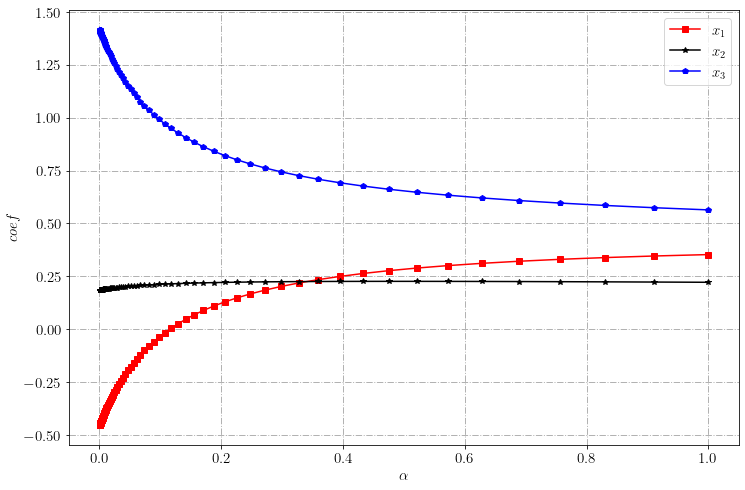

最优岭参数= 0.001788649529057435
标准化数据的所有回归系数为： [0.25175125 0.2261851  0.6902453 ]
Mean:
 [198.30909091   3.3        139.73636364  21.89090909] 
 ------------------------------------------------------------
Std:
 [27.90890376  1.64924225 20.63440199  4.54366692] 
 ------------------------------------------------------------
原数据的回归系数为： [-9.532026187037488, array([0.04098598, 0.62314057, 0.15199106])]
拟合优度： 0.9843368597895964


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV # Ridge求解岭回归
from scipy.stats import zscore

plt.rc('text', usetex=True) # 需要安装LaTeX宏包
plt.rc('axes',unicode_minus=False)

a = np.array([[149.3, 4.2, 108.1, 15.9],
              [171.5, 4.1, 114.8, 16.4],
              [175.5, 3.1, 123.2, 19.0],
              [180.8, 3.1, 126.9, 19.1],
              [190.7, 1.1, 132.1, 18.8],
              [202.1, 2.2, 137.7, 20.4],
              [202.1, 2.1, 146.0, 22.7],
              [212.4, 5.6, 154.1, 26.5],
              [226.1, 5.0, 162.3, 28.1],
              [231.9, 5.1, 164.3, 27.6],
              [239.0, 0.7, 167.6, 26.3]
])

n = a.shape[1] - 1 # 自变量的总个数
aa = zscore(a) # 数据标准化
print("数据标准化:\n", aa, '\n', '-'*60)

x = aa[:, :n] # 标准化后的自变量观测值
y = aa[:, n] # 标准化后的因变量观测值

b = [] # 用于存储回归系数的空列表
kk = np.logspace(-4, 0, 100) # 循环迭代的不同k值，k即岭参数
print('kk:\n', kk, '\n', '-'*60)
for k in kk:
    model = Ridge(alpha=k).fit(x, y)
    b.append(model.coef_)
print('b:\n', b, '\n', '-'*60)

st = ['s-r', '*-k', 'p-b'] # 下面画图的控制字符串
plt.figure(figsize=(12,8))
for i in range(3):
    plt.plot(kk, np.array(b)[:, i], st[i])
plt.legend(['$x_1$', '$x_2$', '$x_3$'], fontsize=15)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$coef$")
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.show()

modelCV = RidgeCV(alphas=np.logspace(-4, 0, 100)).fit(x, y)
print('最优岭参数=', modelCV.alpha_)
# model0 = Ridge(modelCV.alpha_).fit(x, y) # 构建并拟合模型，通过RidgeCV函数求出的最优岭参数拟合出的x_1系数为负，最终主观确定k=0.4
model0 = Ridge(0.4).fit(x, y) # 构建并拟合模型
cs0 = model0.coef_ # 提出标准化数据的回归系数b1,b2,b3
print('标准化数据的所有回归系数为：', cs0)

# 计算所有指标的均值和标准差
Mean = np.mean(a, axis=0)
print('Mean:\n', Mean, '\n', '-'*60)
Std = np.std(a, axis=0, ddof=1)
print('Std:\n', Std, '\n', '-'*60)

params = [Mean[-1] - Std[-1]*sum(cs0*Mean[:-1]/Std[:-1]), Std[-1]*cs0/Std[:-1]]
print('原数据的回归系数为：', params)
print('拟合优度：', model0.score(x, y))

### 3.LASSO回归
**本质：** 选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$J(\boldsymbol{\beta})=\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{1}$达到最小值

#### （1）数学原理简介
多元回归中的普通最小二乘法是拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}$达到最小值。岭回归是选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{2}^{2}$达到最小值，解决了$\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}$不可逆的问题。LASSO回归，是选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得
\begin{equation}
J(\boldsymbol{\beta})=\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{1}
\tag{(7)}
\end{equation}
达到最小值，其中$k\|\boldsymbol{\beta}\|_{1}$为目标函数的**惩罚项**，$k$为**惩罚系数**。
由于式(7)中的惩罚项是关于回归系数$\beta$的绝对值之和，因此惩罚项在零点处是不可导的，那么应用在岭回归上的最小二乘法在此失效，不仅如此，梯度下降法、牛顿法与拟牛顿法都无法计算出LASSO回归的拟合系数。**坐标下降法**可以求得LASSO回归系数，坐标下降法与梯度下降法类似，都属于迭代算法，所不同的是坐标轴下降法是沿着坐标轴下降，而梯度下降法则是沿着梯度的负方向下降，具体的数学原理这里就不介绍了。
由于拟合LASSO回归模型参数时，使用的损失函数(机器学习中的用语)式(7)中包含惩罚系数$k$，因此在计算模型回归系数之前，仍然需要得到最理想的$k$值。与岭回归模型类似，$k$值的确定可以通过**定性的可视化方法**。

#### （2）例题
**例** 求"多重线性关系"一节中法国经济问题的LASSO回归方程.
**解** 画出的$k$与LASSO回归系数的关系图如下图所示，从图中可以看出选$k=0.21$较好。对应的标准化LASSO回归方程为
$$
\hat{y}^{*}=0.0136 x_{2}^{*}+0.7614 x_{3}^{*}
$$
将标准化回归方程还原后得
$$
\hat{y}=-1.6602+0.0374 x_{2}+0.1677 x_{3}
$$

数据标准化:
 [[-1.84174802  0.5723404  -1.6080184  -1.38287391]
 [-1.00747819  0.50874702 -1.26746968 -1.26745955]
 [-0.8571593  -0.12718675 -0.84051307 -0.66730486]
 [-0.65798677 -0.12718675 -0.65244885 -0.64422199]
 [-0.28594752 -1.3990543  -0.38814237 -0.71347061]
 [ 0.14246131 -0.69952715 -0.10350463 -0.34414465]
 [ 0.14246131 -0.76312053  0.31836916  0.18676142]
 [ 0.52953245  1.46264768  0.73007732  1.06391058]
 [ 1.04437464  1.08108742  1.1468683   1.43323655]
 [ 1.26233703  1.14468079  1.24852463  1.31782218]
 [ 1.52915306 -1.65342781  1.41625759  1.01774484]] 
 ------------------------------------------------------------
kk:
 [1.00000000e-04 1.09749877e-04 1.20450354e-04 1.32194115e-04
 1.45082878e-04 1.59228279e-04 1.74752840e-04 1.91791026e-04
 2.10490414e-04 2.31012970e-04 2.53536449e-04 2.78255940e-04
 3.05385551e-04 3.35160265e-04 3.67837977e-04 4.03701726e-04
 4.43062146e-04 4.86260158e-04 5.33669923e-04 5.85702082e-04
 6.42807312e-04 7.05480231e-04 7.74263683e-04 8.49753436e

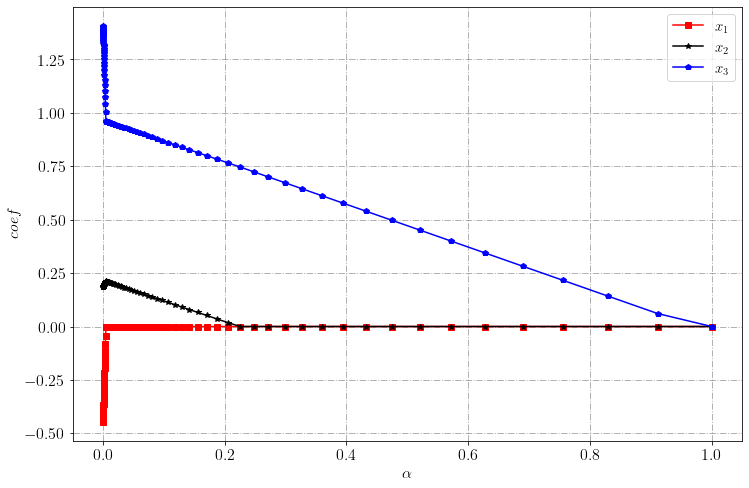

标准化数据的所有回归系数为： [0.13344616 0.22177235 0.81666756]
Mean:
 [198.30909091   3.3        139.73636364  21.89090909] 
 ------------------------------------------------------------
Std:
 [27.90890376  1.64924225 20.63440199  4.54366692] 
 ------------------------------------------------------------
原数据的回归系数为： [-9.562361191275148, array([0.0217255 , 0.61098343, 0.17982907])]
拟合优度： 0.9880416699415154


In [ ]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from scipy.stats import zscore

plt.rc('font',size=16)
plt.rc('text', usetex=True)  # 需要安装LaTeX宏包

a = np.array([[149.3, 4.2, 108.1, 15.9],
              [171.5, 4.1, 114.8, 16.4],
              [175.5, 3.1, 123.2, 19.0],
              [180.8, 3.1, 126.9, 19.1],
              [190.7, 1.1, 132.1, 18.8],
              [202.1, 2.2, 137.7, 20.4],
              [202.1, 2.1, 146.0, 22.7],
              [212.4, 5.6, 154.1, 26.5],
              [226.1, 5.0, 162.3, 28.1],
              [231.9, 5.1, 164.3, 27.6],
              [239.0, 0.7, 167.6, 26.3]
])

n = a.shape[1] - 1 # 自变量的总个数
aa = zscore(a) # 数据标准化
print("数据标准化:\n", aa, '\n', '-'*60)

x = aa[:, :n] # 标准化后的自变量观测值
y = aa[:, n] # 标准化后的因变量观测值

b = [] # 用于存储回归系数的空列表
kk = np.logspace(-4, 0, 100) # 循环迭代的不同k值，k即惩罚系数
print('kk:\n', kk, '\n', '-'*60)
for k in kk:
    model = Lasso(alpha=k).fit(x, y)
    b.append(model.coef_)
print('b:\n', b, '\n', '-'*60)

st = ['s-r', '*-k', 'p-b'] # 下面画图的控制字符串
plt.figure(figsize=(12,8))
for i in range(3):
    plt.plot(kk, np.array(b)[:, i], st[i])
plt.legend(['$x_1$', '$x_2$', '$x_3$'], fontsize=15)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$coef$")
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.show()

# model0 = Ridge(modelCV.alpha_).fit(x, y) # 构建并拟合模型，通过LassoCV函数求出的最优岭参数拟合出的系数可能不合适
model0 = Ridge(0.21).fit(x, y) # 构建并拟合模型
cs0 = model0.coef_ # 提出标准化数据的回归系数b1,b2,b3
print('标准化数据的所有回归系数为：', cs0)

# 计算所有指标的均值和标准差
Mean = np.mean(a, axis=0) # Mean = a.mean(axis=0)
print('Mean:\n', Mean, '\n', '-'*60)
Std = np.std(a, axis=0, ddof=1) # Std = a.std(axis=0, ddof=1)
print('Std:\n', Std, '\n', '-'*60)

params = [Mean[-1] - Std[-1]*sum(cs0*Mean[:-1]/Std[:-1]), Std[-1]*cs0/Std[:-1]]
print('原数据的回归系数为：', params)
print('拟合优度：', model0.score(x, y))

**例** 在建立中国私人轿车拥有量模型时，主要考虑以下因素: (1)城镇居民家庭人均可支配收入$x_{1}$(元)，(2)全国城镇人口$x_{2}$(亿人)，(3)全国汽车产量$x_{3}$(万辆)，(4)全国公路长度 $x_{4}$(万千米)。具体数据见下表，其中$y$表示中国私人轿车拥有量(万辆)。试建立$y$的经验公式。
对于上述问题，可以直接用普通的最小二乘法建立$y$关于四个解释变量$x_{1}, x_{2}$, $x_{3}$和$x_{4}$的回归方程为
$$
\hat{y}=-1028.4134-0.0159 x_{1}+245.6120 x_{2}+1.6316 x_{3}+2.0294 x_{4}
$$
模型的检验见下面程序运行结果，这里就不具体给出了。

表 $1994 \sim 2002$年中国私人轿车拥有量及相关变量数据

\begin{array}{cccclc}
\hline 年份 & x_{1} & x_{2} & x_{3} & x_{4} & y \\
\hline 1994 & 3496.2 & 3.43 & 136.69 & 111.78 & 205.42 \\
1995 & 4283 & 3.52 & 145.27 & 115.7 & 249.96 \\
1996 & 4838.9 & 3.73 & 147.52 & 118.58 & 289.67 \\
1997 & 5160.3 & 3.94 & 158.25 & 122.64 & 358.36 \\
1998 & 5425.1 & 4.16 & 163 & 127.85 & 423.65 \\
1999 & 5854 & 4.37 & 183.2 & 135.17 & 533.88 \\
2000 & 6280 & 4.59 & 207 & 140.27 & 625.33 \\
2001 & 6859.6 & 4.81 & 234.17 & 169.8 & 770.78 \\
2002 & 7702.8 & 5.02 & 325.1 & 176.52 & 968.98 \\
\hline
\end{array}
在$\alpha=0.05$的水平下，以上的回归方程是显著的。但变量$x_{1}$对$y$是不显著的，且回归方程中$x_{1}$前面的系数为负值也不合理。
选择$k=0.05$，建立的LASSO回归方程为
$$
\hat{y}=-908.2059+203.0938 x_{2}+1.4562 x_{3}+2.0469 x_{4}
$$

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1623.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           1.14e-06
Time:                        13:45:33   Log-Likelihood:                -28.919
No. Observations:                   9   AIC:                             67.84
Df Residuals:                       4   BIC:                             68.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1028.4134     58.305    -17.638      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


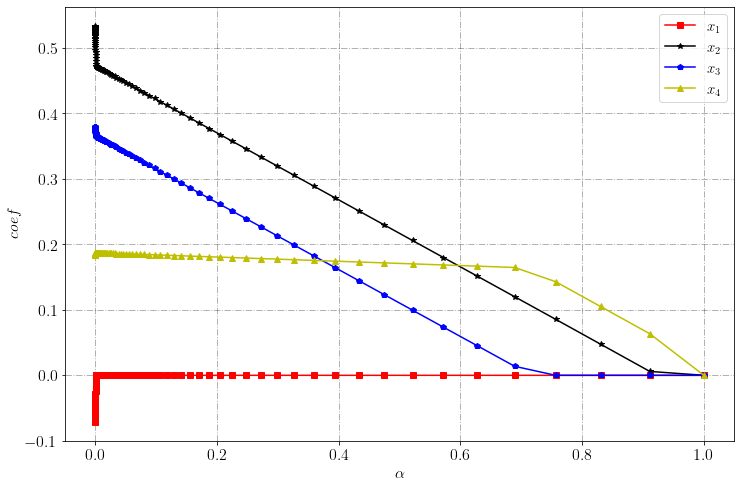

标准化数据的所有回归系数为： [0.         0.44723893 0.34045523 0.18555833]
Mean:
 [5.54443333e+03 4.17444444e+00 1.88911111e+02 1.35367778e+02
 4.91781111e+02] 
 ------------------------------------------------------------
Std:
 [1.29764931e+03 5.66240035e-01 6.01164596e+01 2.33096057e+01
 2.57132957e+02] 
 ------------------------------------------------------------
原数据的回归系数为： [-908.2058953990941, array([  0.        , 203.09384921,   1.45621116,   2.04693134])]
拟合优度： 0.9965807211503689


In [ ]:
import numpy as np; import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from scipy.stats import zscore

plt.rc('font',size=16)
plt.rc('text', usetex=True)  # 需要安装LaTeX宏包

a = np.array([[3496.2, 3.43, 136.69, 111.78, 205.42],
              [4283,   3.52, 145.27, 115.7,  249.96],
              [4838.9, 3.73, 147.52, 118.58, 289.67],
              [5160.3, 3.94, 158.25, 122.64, 358.36],
              [5425.1, 4.16, 163,    127.85, 423.65],
              [5854,   4.37, 183.2,  135.17, 533.88],
              [6280,   4.59, 207,    140.27, 625.33],
              [6859.6, 4.81, 234.17, 169.8,  770.78],
              [7702.8, 5.02, 325.1,  176.52, 968.98]
])

n = a.shape[1] - 1 # 自变量的总个数

x = a[:, :n]  # 提出自变量观测值矩阵
X = sm.add_constant(x)
md = sm.OLS(a[:, n],X).fit() # 构建并拟合模型
print(md.summary())  #输出模型的所有结果

aa = zscore(a)  #数据标准化
x = aa[:, :n]
y = aa[:, n]  # 提出自变量和因变量观测值矩阵
b=[]  # 用于存储回归系数的空列表
kk = np.logspace(-4,0,100)  # 循环迭代的不同k值
for k in kk:
    md = Lasso(alpha=k).fit(x, y)
    b.append(md.coef_)

st = ['s-r','*-k','p-b','^-y'] # 下面画图的控制字符串
plt.figure(figsize=(12,8))
for i in range(n):
    plt.plot(kk, np.array(b)[:, i], st[i])
plt.legend(['$x_1$', '$x_2$', '$x_3$', '$x_4$'], fontsize=15)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$coef$")
plt.grid(axis='x', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.grid(axis='y', linestyle='-.', linewidth=1, color='black', alpha=0.3)
plt.show()

# model0 = Lasso(modelCV.alpha_).fit(x, y) # 构建并拟合模型，通过LassoCV函数求出的最优岭参数拟合出的系数可能不合适
model0 = Lasso(0.05).fit(x, y) # 构建并拟合模型
cs0 = model0.coef_ # 提出标准化数据的回归系数b1,b2,b3
print('标准化数据的所有回归系数为：', cs0)

# 计算所有指标的均值和标准差
Mean = a.mean(axis=0)
print('Mean:\n', Mean, '\n', '-'*60)
Std = a.std(axis=0, ddof=1)
print('Std:\n', Std, '\n', '-'*60)

params = [Mean[-1] - Std[-1]*sum(cs0*Mean[:-1]/Std[:-1]), Std[-1]*cs0/Std[:-1]]
print('原数据的回归系数为：', params)
print('拟合优度：', model0.score(x, y))

#### （3）推广

从上面的讨论可以看到，线性回归模型使用简便，在很多领域都得到了有效的应用。但在实际应用中还会碰到很多**非线性回归模型**，一般的非线性回归模型我们就不介绍了，把非线性回归模型看成拟合一个**非线性函数**就可以了。
前面的多元线性回归模型是假设因变量$y$被建模为自变量$x_{1}, x_{2}, \cdots, x_{m}$的线性组合。但是，我们可以放宽这个假设，拟合一个更为广义的线性模型；可以用一个链接(link)函数$G$来替换公式
$$
y=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}+\varepsilon
$$
将非线性输出转换为一个线性的响应
$$
G(y)=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}+\varepsilon
$$
链接函数$G(y)$有很多取法，例如:
(1)$G(y)=\ln \frac{y}{1-y}$，把0到1范围之间的响应映射到一个线性坐标上，其中$y$通常是一个0到1之间的概率值。
(2)$G(y)=\ln (y)$，把计数值转换成线性输出，其中$y$为计数值。

### 4.Tao
**本质：** 选择合适的参数$k \geqslant 0$，拟合参数向量$\boldsymbol{\beta}$，使得$J(\boldsymbol{\beta})=\|\boldsymbol{X} \boldsymbol{\beta}-\boldsymbol{Y}\|_{2}^{2}+k\|\boldsymbol{\beta}\|_{0}$达到最小值。
实际问题用前几种回归模型即可。

## （三）Logistic回归
下面只介绍广义线性回归中的Logistic回归

### 1.Logistic回归模型
#### （1）模型的构建
Logistic回归，与普通回归任务不同，分类的结果输出是**有限的离散值**。以二分类为例，结果输出要么为0，要么为1，即$y \in\{0,1\}$。其基本思想是在空间中构造一个合理的超平面，把空间区域划分为两个子空间，每一种类别数据都在平面的某一侧。不能按照多元线性回归式
\begin{equation}
f(\boldsymbol{x})=\beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}
\tag{(8)}
\end{equation}
来分类，因为直接使用式(8)得到的是实数值，需要将实数值规约为0或1，较理想的是**阶跃函数**
\begin{equation}
f(\boldsymbol{x})=
\begin{cases}
0, & \beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m} \leqslant 0\\
1, & \beta_{0}+\beta_{1} x_{1}+\cdots+\beta_{m} x_{m}>0
\end{cases}
\tag{(9)}
\end{equation}
但阶跃函数在0点不连续、不可导。为此，可以通过**阶跃函数的平滑版本**，即**Sigmoid函数**来为我们实现：
\begin{equation}
f_{\boldsymbol{\beta}}(\boldsymbol{x})=\frac{1}{1+e^{-\left(\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}\right)}}
\tag{(10)}
\end{equation}
其中，$\boldsymbol{\beta}=\left[\beta_{0}, \beta_{1}, \cdots, \beta_{m}\right]^{\mathrm{T}}$。
Sigmoid函数具有很多优秀的性质：它将输入数据压缩至0到1的范围内，得到的结果不是二值输出，而是一个概率值，通过这个数值，可以确定输入数据分别属于0类或属于1类的概率：
\begin{equation}
P\{y=1 \mid \boldsymbol{x}\}=f_{\boldsymbol{\beta}}(\boldsymbol{x})=\frac{e^{\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}}}{1+e^{\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}}}=p
\tag{(11)}
\end{equation}
\begin{equation}
P\{y=0 \mid \boldsymbol{x}\}=1-f_{\boldsymbol{\beta}}(\boldsymbol{x})=\frac{1}{1+e^{\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}}}=1-p .
\tag{(12)}
\end{equation}
由式(11)和(12)可以得到
\begin{equation}
\ln \frac{p}{1-p}=\ln \frac{P\{y=1 \mid \boldsymbol{x}\}}{P\{y=0 \mid \boldsymbol{x}\}}=\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}
\tag{(13)}
\end{equation}
式(13)称为**Logistic回归模型**，式(13)的左边是与概率相关的对数值。因此，无法使用通常的最小二乘法拟合末知参数向量$\beta$，而是采用**极大似然估计法**。
式(13)也可以改写为
\begin{equation}
p=\frac{1}{1+e^{-\left(\beta_{0}+\sum_{j=1}^{m} \beta_{j} x_{j}\right)}},
\tag{(14)}
\end{equation}
其中，$p$为事件发生的概率。

#### （2）Logistic模型的参数估计

为了构造似然函数，把式(11)和(12)统一改写为
\begin{equation}
P\{y \mid \boldsymbol{x} ; \boldsymbol{\beta}\}=f_{\boldsymbol{\beta}}(\boldsymbol{x})^{y}\left(1-f_{\boldsymbol{\beta}}(\boldsymbol{x})\right)^{1-y}, \quad y=0 \text { 或 } 1 .
\tag{(15)}
\end{equation}
为了拟合模型中的末知参数向量$\beta$，使用**极大似然估计法**，需要构造似然函数。似然函数的统计背景是，如果数据集$\left\{\left(\boldsymbol{x}_{i}, y_{i}\right), i=1,2, \cdots, n\right\}$中每个样本点都是相互独立的，则$n$个样本点发生的联合概率就是各样本点事件发生的概率乘积，故似然函数可以表示为
$$
L(\boldsymbol{\beta})=\prod_{i=1}^{n} P\left\{y_{i} \mid \boldsymbol{x}_{i} ; \boldsymbol{\beta}\right\}=\prod_{i=1}^{n}\left[f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)^{y_{i}}\left(1-f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)\right)^{1-y_{i}}\right]
$$
为了求解方便，将似然函数做对数处理，得到
\begin{equation}
\tilde{L}(\boldsymbol{\beta})=\sum_{i=1}^{n}\left[y_{i} \ln f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)+\left(1-y_{i}\right) \ln \left(1-f_{\boldsymbol{\beta}}\left(\boldsymbol{x}_{i}\right)\right)\right]
\tag{(16)}
\end{equation}
拟合参数向量$\boldsymbol{\beta}$，转化为求函数$\tilde{L}(\boldsymbol{\beta})$的最大值，无法求得其解析解，只能求**数值解**，可以使用经典的**梯度下降算法**求解参数向量 $\boldsymbol{\beta}$，具体算法这里就不给出了。下面给出在分组数据情形下参数向量$\beta$的最小二乘估计。

#### （3）分组数据情形下参数的最小二乘估计

在对因变量进行的$n$次观测$y_{i}, i=1,2, \cdots, n$中，如果在相同的$\boldsymbol{x}_{(i)}=\left[x_{i 1}\right.$, $\left.x_{i 2}, \cdots, x_{i m}\right]^{\mathrm{T}}$处进行了多次重复观测，这种结构的数据称为**分组数据**，分组个数记为$c$，则在式(13)中可用样本比例对概率$p$进行估计，对应$\boldsymbol{x}_{(i)}$的概率估计值记作 $\hat{p}_{i}$，并记
\begin{equation}
y_{i}^{*}=\ln \left(\frac{\hat{p}_{i}}{1-\hat{p}_{i}}\right), \quad i=1,2, \cdots, c
\tag{(17)}
\end{equation}
则得
$$
y_{i}^{*}=\beta_{0}+\sum_{j=1}^{p} \beta_{j} x_{i j}, \quad i=1,2, \cdots, c
$$
由线性回归模型的知识可知，参数$\boldsymbol{\beta}=\left[\beta_{0}, \beta_{1}, \cdots, \beta_{m}\right]^{\mathrm{T}}$的最小二乘估计为
\begin{equation}
\hat{\boldsymbol{\beta}}=\left(\boldsymbol{X}^{\mathrm{T}} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{\mathrm{T}} \boldsymbol{y}^{*},
\tag{(18)}
\end{equation}
其中
$$
\boldsymbol{y}^{*}=\left[\begin{array}{c}
y_{1}^{*} \\
y_{2}^{*} \\
\vdots \\
y_{c}^{*}
\end{array}\right], \quad \boldsymbol{X}=\left[\begin{array}{cccc}
1 & x_{11} & \cdots & x_{1 m} \\
1 & x_{21} & \cdots & x_{2 m} \\
\vdots & \vdots & & \vdots \\
1 & x_{c 1} & \cdots & x_{c m}
\end{array}\right] .
$$

下面用一个例子来说明分组数据Logistic回归模型的参数估计。
**例** 在一次住房展销会上，与房地产商签订初步购房意向书的共有$n=$325名顾客，在随后的3个月时间内，只有一部分顾客确实购买了房屋。购买了房屋的顾客记为1，没有购买房屋的顾客记为0。以顾客的家庭年收入为自变量$x$，家庭年收入按照高低不同分成了9组，数据列在下表中。下表还列出了在每个不同的家庭年收入组中签订意向书的人数$n_{i}$和相应的实际购房人数$m_{i}$。房地产商希望能建立签订意向的顾客最终真正买房的概率与家庭年收入间的关系式，以便能分析家庭年收入的不同对最终购买住房的影响。

\begin{array}{cccccc}
\hline 序号 & 家庭年收入 & 签订意向书人数 & 实际购房人数 & 实际购房比例 & 逻辑变换 \\
& x / 万元 & n_{i} & m_{i} & \hat{p}_{i}=\frac{m_{i}}{n_{i}} & y_{i}^{*}=\ln \left(\frac{\hat{p}_{i}}{1-\hat{p}_{i}}\right) \\
\hline 1 & 1.5 & 25 & 8 & 0.32 & -0.7538 \\
2 & 2.5 & 32 & 13 & 0.4063 & -0.3795 \\
3 & 3.5 & 58 & 26 & 0.4483 & -0.2076 \\
4 & 4.5 & 52 & 22 & 0.4231 & -0.3102 \\
5 & 5.5 & 43 & 20 & 0.4651 & -0.1398 \\
6 & 6.5 & 39 & 22 & 0.5641 & 0.2578 \\
7 & 7.5 & 28 & 16 & 0.5714 & 0.2877 \\
8 & 8.5 & 21 & 12 & 0.5714 & 0.2877 \\
9 & 9.5 & 15 & 10 & 0.6667 & 0.6931 \\
\hline
\end{array}

**解** 显然，这里的因变量是0-1型的伯努利随机变量，因此可通过Logistic回归来建立签订意向的顾客最终真正买房的概率与家庭年收入之间的关系。由于上表中，对应同一个家庭年收入组有多个重复观测值，因此可用样本比例来估计第$i$个家庭年收入组中客户最终购买住房的概率$p_{i}$，其估计值记为$\hat{p}_{i}$。然后，对$\hat{p}_{i}$进行逻辑变换。$\hat{p}_{i}$的值及其经逻辑变换后的值$y_{i}^{*}$都列在上表中.
本例中，自变量个数$m=1$，分组数$c=9$，由(18)式计算可得$\beta_{0}, \beta_{1}$的最小二乘估计分别为
$$
\hat{\beta}_{0}=-0.8863, \quad \hat{\beta}_{1}=0.1558
$$
相应的线性回归方程为
$$
\hat{y}^{*}=-0.8863+0.1558 x
$$
决定系数$R^{2}=0.924, F$统计量$=85.42$，显著性检验$p \approx 0$，线性回归方程高度**显著**。最终所得的Logistic回归方程为
\begin{equation}
\hat{p}=\frac{1}{1+e^{0.8863-0.1558 x}}
\tag{(19)}
\end{equation}
由(19)式可知，$x$越大，即家庭年收入越高，$\hat{p}$就越大，即签订意向后真正买房的概率就越大。对于一个家庭年收入为9万元的客户，将$x=x_{0}=9$代入回归方程(19)中，即可得其签订意向后真正买房的概率
$$
\hat{p}_{0}=\frac{1}{1+e^{0.8863-0.1558 x_{0}}}=0.6262
$$
这也可以说，约有$62.62 \%$的家庭年收入为9万元的客户，其签订意向后会真正买房。




In [ ]:
import numpy as np
import statsmodels.api as sm

a = np.array([[1.5, 25, 8 ],
              [2.5, 32, 13],
              [3.5, 58, 26],
              [4.5, 52, 22],
              [5.5, 43, 20],
              [6.5, 39, 22],
              [7.5, 28, 16],
              [8.5, 21, 12],
              [9.5, 15, 10]
])

x = a[:, 0]
pi = a[:,2]/a[:,1]
X = sm.add_constant(x)
yi = np.log(pi/(1 - pi))
model = sm.OLS(yi,X).fit()  #构建并拟合模型
print(model.summary())  #输出模型的所有结果
b = model.params  #提出所有的回归系

# 计算年收入对应概率
money = 9
p0 = 1/(1 + np.exp(-np.dot(b, [1, money])))
print("年收入为{}万元时确定购房所的概率为{:.4f}".format(money, p0))
# np.savetxt("Pdata12_7_2.txt", b)  #把回归系数保存到文本文件

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     85.42
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.59e-05
Time:                        13:46:00   Log-Likelihood:                 6.6829
No. Observations:                   9   AIC:                            -9.366
Df Residuals:                       7   BIC:                            -8.971
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8863      0.102     -8.653      0.0

d:\programme\python\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


### 2.Logistic回归模型的应用

#### （1）Logistic模型的参数解释
在流行病学中，经常需要研究某一疾病发生与不发生的可能性大小，如一个人得流行性感冒相对于不得流行性感冒的可能性是多少，对此常用**赔率**来度量。赔率的具体定义如下：
**定义** 一个随机事件$A$发生的概率与其不发生的概率之比值称为事件$A$的**赔率**，记为$\operatorname{odds}(A)$，即$\operatorname{odds}(A)=\frac{P(A)}{P(\bar{A})}=\frac{P(A)}{1-P(A)}$.
如果一个事件$A$发生的概率$P(A)=0.75$，则其不发生的概率$P(\bar{A})=1-$ $P(A)=0.25$，所以事件$A$的赔率$\operatorname{odds}(A)=\frac{0.75}{0.25}=3$。这就是说，事件$A$发生与不发生的可能性是$3: 1$。粗略地讲，即在4次观测中有3次事件$A$发生而有一次$A$不发生。例如，事件$A$表示 “投资成功”，那么$\operatorname{odds}(A)=3$即表示投资成功的可能性是投资不成功的3倍。又例如，事件$B$表示“客户理赔事件”，且已知$P(B)=0.25$，则$P(\bar{B})=0.75$，从而事件$B$的赔率$\operatorname{odds}(B)=\frac{1}{3}$，这表明发生客户理赔事件的风险是不发生的$\frac{1}{3}$。用赔率可很好地度量一些经济现象发生与否的可能性大小。
仍以上述“客户理赔事件”为例，有时还需要研究某一群客户相对于另一群客户发生客户理赔事件的风险大小，如职业为司机的客户群相对于职业为教师的客户群发生客户理赔事件的风险大小，这需要用到赔率比的概念。
**定义** 随机事件$A$的赔率与随机事件$B$的赔率之比值称为**事件$A$对事件$B$的赔率比**，记为$\operatorname{OR}(A, B)$，即$\operatorname{OR}(A, B)=\operatorname{odds}(A) / \operatorname{odds}(B)$。
若记$A$是职业为司机的客户发生理赔事件，记$B$是职业为教师的客户发生理赔事件，又已知$\operatorname{odds}(A)=\frac{1}{20}, \operatorname{odds}(B)=\frac{1}{30}$，则事件$A$对事件$B$的赔率比$\operatorname{OR}(A, B)=\operatorname{odds}(A) / \operatorname{odds}(B)=1.5$。这表明职业为司机的客户发生理赔的赔率是职业为教师的客户的$1.5$倍。
应用Logistic回归可以方便地估计一些事件的赔率及多个事件的赔率比。下面仍以上例客户购房来说明Logistic回归在这方面的应用。

**例** 房地产商希望能估计出一个家庭年收入为9万元的客户签订意向后最终买房与不买房的可能性大小之比值，以及一个家庭年收入为9万元的客户签订意向后最终买房的赔率是年收入为8万元客户的多少倍。
**解** 由上例中所得的模型(19)得
$$
\ln \left(\frac{\hat{p}}{1-\hat{p}}\right)=-0.8863+0.1558 x
$$
因此
\begin{equation}
\frac{\hat{p}}{1-\hat{p}}=e^{-0.8863+0.1558 x}
\tag{(20)}
\end{equation}
将$x=x_{0}=9$代入上式，得一个家庭年收入为9万元的客户签订意向后最终买房与不买房的可能性大小之比值为
$$
\text { odds (年收入 } 9 \text { 万) }=\frac{\hat{p}_{0}}{1-\hat{p}_{0}}=e^{-0.8863+0.1558 \times 9}=1.6752
$$
这说明一个家庭年收入为9万元的客户签订意向后最终买房的可能性是不买房的可能性的$1.6752$倍.
另外，由(20)式还可得
$$
\mathrm{OR}\left(\text {年收入} 9 \text {万元，年收入 } 8 \text {万元} \right) = \frac{e^{-0.8863+0.1558 \times 9}}{e^{-0.8863+0.1558 \times 8}}=1.1686
$$
所以一个家庭年收入为9万元的客户其签订意向后最终买房的赔率是年收入为8万元客户的$1.1686$倍。

In [ ]:
# 首先运行上例代码，将model参数导入python
odds9 = np.exp(np.dot(b, [1, 9]))
odds9vs8 = np.exp(np.dot([1, 9], b)) / np.exp(np.dot([1, 8], b))
print("odds9={:.4f}\nodds9vs8={:.4f}".format(odds9, odds9vs8))

odds9=1.6752
odds9vs8=1.1686


一般地，如果Logistic模型(13)的参数估计为$\hat{\beta}_{0}, \hat{\beta}_{1}, \cdots, \hat{\beta}_{m}$，则在$x_{1}=x_{01}$, $x_{2}=x_{02}, \cdots, x_{m}=x_{0 m}$条件下事件赔率的估计值为
$$
\frac{\hat{p}_{0}}{1-\hat{p}_{0}}=e^{\hat{\beta}_{0}+\sum_{j=1}^{m} \hat{\beta}_{j} x_{0 j}}
$$

如果记$\boldsymbol{X}_{A}=\left[1, x_{A 1}, x_{A 2}, \cdots, x_{A m}\right]^{\mathrm{T}}, \boldsymbol{X}_{B}=\left[1, x_{B 1}, x_{B 2}, \cdots, x_{B m}\right]^{\mathrm{T}}$，并将相应条件下的事件仍分别记为$\boldsymbol{X}_{A}$和$\boldsymbol{X}_{B}$，则事件$\boldsymbol{X}_{A}$对事件$\boldsymbol{X}_{B}$的赔率比的估计可由下式获得
$$
\operatorname{OR}\left(\boldsymbol{X}_{A}, \boldsymbol{X}_{B}\right)=e^{\sum_{j=1}^{m} \hat{\beta}_{j}\left(x_{A j}-x_{B j}\right)}
$$


#### （2）用statsmodels库函数求解
**例** 企业到金融商业机构贷款，金融商业机构需要对企业进行评估。评估结果为0,1两种形式，0表示企业两年后破产，将拒绝贷款；而1表示企业两年后具备还款能力，可以贷款。下表中，已知前20家企业的三项评价指标值和评估结果，试建立模型对其他两家企业(企业21, 22)进行评估。

表 企业还款能力评价表

\begin{array}{crrrrr}
\hline
企业编号 & x_{1} & x_{2} & x_{3} & y & y 的预溂值 \\
\hline
1  & -62.3  & -89.5 & 1.7 & 0 & 0 \\
2  & 3.3    & -3.5  & 1.1 & 0 & 0 \\
3  & -120.8 & -103.2& 2.5 & 0 & 0 \\
4  & -18.1  & -28.8 & 1.1 & 0 & 0 \\
5  & -3.8   & -50.6 & 0.9 & 0 & 0 \\
6  & -61.2  & -56.2 & 1.7 & 0 & 0 \\
7  & -20.3  & -17.4 & 1   & 0 & 0 \\
8  & -194.5 & -25.8 & 0.5 & 0 & 0 \\
9  & 20.8   & -4.3  & 1   & 0 & 0 \\
10 & -106.1 & -22.9 & 1.5 & 0 & 0 \\
11 & 43     & 16.4  & 1.3 & 1 & 1 \\
12 & 47     & 16    & 1.9 & 1 & 1 \\
13 & -3.3   & 4     & 2.7 & 1 & 1 \\
14 & 35     & 20.8  & 1.9 & 1 & 1 \\
15 & 46.7   & 12.6  & 0.9 & 1 & 1 \\
16 & 20.8   & 12.5  & 2.4 & 1 & 1 \\
17 & 33     & 23.6  & 1.5 & 1 & 1 \\
18 & 26.1   & 10.4  & 2.1 & 1 & 1 \\
19 & 68.6   & 13.8  & 1.6 & 1 & 1 \\
20 & 37.3   & 33.4  & 3.5 & 1 & 1 \\
21 & -49.2  & -17.2 & 0.3 & & 0 \\
22 & 40.6   & 26.4  & 1.8 & & 1 \\
\hline
\end{array}
**解** 对于该问题，可以用Logistic模型来求解。建立如下的Logistic回归模型
$$
p=P\{y=1\}=\frac{1}{1+e^{-\left(\beta_{0}+\sum_{j=1}^{3} \beta_{j} x_{j}\right)}}
$$
记$x_{i j}(i=1,2, \cdots, 20 ; j=1,2,3)$分别为变量$x_{j}(j=1,2,3)$的20个观测值，$y_{i}(i=1,2, \cdots, 20)$是20个$y$的观测值。
使用最大似然估计法，求模型中的参数$\beta_{0}, \beta_{1}, \beta_{2}, \beta_{3}$，即求参数$\beta_{0}, \beta_{1}, \beta_{2}, \beta_{3}$使得似然函数
$$
\ln L(\boldsymbol{\beta})=\sum_{i=1}^{20}\left[y_{i}\left(\beta_{0}+\sum_{j=1}^{3} \beta_{j} x_{i j}\right)-\ln \left(1+e^{\beta_{0}+\sum_{j=1}^{3} \beta_{j} x_{i j}}\right)\right]
$$
达到最大值。
利用Python的statsmodels库函数求得
$$
\beta_{0}=0, \quad \beta_{1}=-0.3497, \quad \beta_{2}=3.2290, \quad \beta_{3}=2.2372
$$
因而得到的Logistic回归模型为
$$
\left\{
\begin{aligned}
p &=\frac{1}{1+e^{-\left(-0.3497 x_{1}+3.2290 x_{2}+2.2372 x_{3}\right)}}, \\
y &=
\begin{cases}
0, & p \leqslant 0.5, \\
1, & p>0.5
\end{cases}
\end{aligned}
\right.
$$
利用已知数据对上述Logistic模型进行检验，准确率达到100\%，说明模型的准确率较高，可以用来预测新企业的还款能力。两个新企业的预测结果见上表的最后1列，即企业21拒绝贷款，企业22可以贷款。

**例** 使用sklearn库函数求解上例
**解** 求得的Logistic回归模型为、
$$
\left\{
\begin{aligned}
p &=\frac{1}{1+e^{-\left(-0.3906 - 0.0507 x_{1} + 0.6707 x_{2} + 0.1051 x_{3}\right)}}, \\
y &=
\begin{cases}
0, & p \leqslant 0.5, \\
1, & p>0.5
\end{cases}
\end{aligned}
\right.
$$
利用已知数据对上述Logistic模型进行检验准确率达到100\%，说明模型的准确率较高，可以用来预测新企业的还款能力。两个新企业的预测结果为：企业21拒绝贷款，企业22可以贷款。

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

a=np.array([[-62.3,  -89.5,  1.7, 0],
            [3.3,    -3.5,   1.1, 0],
            [-120.8, -103.2, 2.5, 0],
            [-18.1,  -28.8,  1.1, 0],
            [-3.8,   -50.6,  0.9, 0],
            [-61.2,  -56.2,  1.7, 0],
            [-20.3,  -17.4,  1,   0],
            [-194.5, -25.8,  0.5, 0],
            [20.8,   -4.3,   1,   0],
            [-106.1, -22.9,  1.5, 0],
            [43,      16.4,  1.3, 1],
            [47,      16,    1.9, 1],
            [-3.3,     4,    2.7, 1],
            [35,      20.8,  1.9, 1],
            [46.7,    12.6,  0.9, 1],
            [20.8,    12.5,  2.4, 1],
            [33,      23.6,  1.5, 1],
            [26.1,    10.4,  2.1, 1],
            [68.6,    13.8,  1.6, 1],
            [37.3,    33.4,  3.5, 1]
])

n = a.shape[1] # 提取矩阵的列数
x = a[:, :n-1]
y = a[:, n-1]
model = LogisticRegression(solver='lbfgs').fit(x,y)
print('拟合系数beta：\nbeta0={}\nbeta1={}\nbeta2={}\nbeta3={}'.format(model.intercept_[0], model.coef_[0, 0], model.coef_[0, 1], model.coef_[0, 2]))
print(model.predict(x)) # 检验预测模型
print(model.predict([[-49.2,-17.2,0.3],[40.6,26.4,1.8]]))  #求预测值


拟合系数beta：
beta0=-0.39060121488206745
beta1=-0.05073412418520253
beta2=0.6707101492837787
beta3=0.10511888390427564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1.]
